In [3]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime

## Getting Stock Data with Yahoo Finance (Old way)

In [ ]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', '^GSPC']

# Define which online source one should use
data_source = 'yahoo'

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2000-01-01'
end_date = '2016-12-31'
start_date = datetime.datetime(2000,1,1)
end_date = datetime.datetime(2016,12,31)

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader('INPX', data_source, start_date, end_date)

## Updated (6/29/17): Getting Stock Data with Google Finance
Over the last few weeks, Yahoo finance has changed the structure of its website and as a result the most popular Python packages for retrieving data have stopped functioning properly. Until this is resolved, the following piece of code will provide sufficient data to run the examples in this series of articles. Data is now taken from Google Fianace and we are using the ETF "SPY" as proxy for S&P 500 on Google Finance.

Please not that if you use this set of data to run the example, you may be getting slightly different results.

In [8]:
from pandas_datareader import data
import pandas as pd


# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', 'SPY']

# Define which online source one should use
data_source = 'google'

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2010-01-01'
end_date = '2016-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, data_source, start_date, end_date)

In [9]:
panel_data

<class 'pandas.core.panel.Panel'>
Dimensions: 5 (items) x 1762 (major_axis) x 3 (minor_axis)
Items axis: Open to Volume
Major_axis axis: 2010-01-04 00:00:00 to 2016-12-30 00:00:00
Minor_axis axis: AAPL to SPY

In [10]:
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = panel_data.ix['Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

close.head(10)

,AAPL,MSFT,SPY
2010-01-01,NaN,NaN,NaN
2010-01-04,30.57,30.95,113.33
2010-01-05,30.63,30.96,113.63
2010-01-06,30.14,30.77,113.71
2010-01-07,30.08,30.45,114.19
2010-01-08,30.28,30.66,114.57
2010-01-11,30.02,30.27,114.73
2010-01-12,29.67,30.07,113.66
2010-01-13,30.09,30.35,114.62
2010-01-14,29.92,30.96,114.93


In [11]:
all_weekdays

DatetimeIndex(['2010-01-01', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', length=1826, freq='B')

In [13]:
close.describe()

,AAPL,MSFT,SPY
count,1761.000000,1761.000000,1761.000000
mean,79.428597,37.134015,164.704651
std,28.317838,10.812267,37.067717
min,27.440000,23.010000,102.200000
25%,55.460000,27.840000,131.210000
50%,78.440000,33.030000,165.310000
75%,103.120000,46.110000,201.990000
max,133.000000,63.620000,227.760000


In [14]:
# Get the MSFT timeseries. This now returns a Pandas Series object indexed by date.
msft = close.ix[:, 'MSFT']
# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_msft = msft.rolling(window=20).mean()
long_rolling_msft = msft.rolling(window=100).mean()

In [15]:
# Plot everything by leveraging the very powerful matplotlib package
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(msft.index, msft, label='MSFT')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

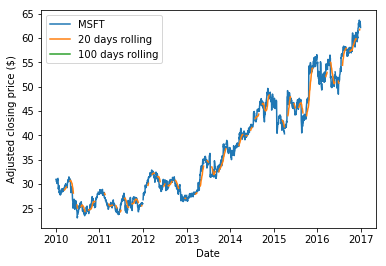

In [16]:
plt.show()